# Cross-validation for parameter tuning, model selection, and feature selection


## Agenda

* What is the drawback of using the train/test split procedure for model evaluation?

* How does **K-fold cross-validation** overcome this limitation?

* How can cross-validation be used for selecting **tuning parameter** choosing between **models**, and selecting **features**?

* What are some possible **improvements** to cross-validation?

## Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

* Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial ideas:** Train and test on the same data

* But, maximizing **training accuracy** rewards overly complex model which **overfit** the training data.

**Alternate idea:** Train/test split

* Split the dataset into two pieces, so that the model can be trained and tested on **different data**

* **Training accuracy** is better estimate than training accuracy of out-of-sample performance

* But, it provides **high variance estimate** since changing which observations happen to be in the testing set can significantly change testing accuracy 

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# load the iris dataset
iris = load_iris()

# create X (feature) and y (response)
X = iris.data
y = iris.target

In [5]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# check classification accuracy of KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


**Question:** What if we create a bunch of train/test split, calculate the accuracy of each and average the results together?

**Answer:** That's the essence of cross-validation!

## Steps for Kfold cross-validation

1. Split the dataset into k **equal** partitions (or "folds")
2. Use fold 1 as **testing set** and union of all other as **training set**.
3. Calculate **testing accuracy**
4. Repeat step 2 and 3 K times, using a **different fold** as testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.


## Comparing cross-validation with train/test split

Advantages of **cross-validation**:

* More accurate estimation of out-of-sample data
* More efficient use of **data** (every observation is used for both training and testing)

Advantages of **train/test**:

* Runs K times faster that Kfold validation
* Simplier to examine the detailed results of testing process.

## Cross-validation recomendations

1. K can be any number, but **k=10** is generally recommended
2. For classification problem, **stratified sampling** is recommended for creating the folds
    * Each response class should be represented with equal proportions in each of the K folds
    * Scikit-learns cross_val_score function does this by default

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameter (aka "hyperparameter") for KNN on this iris_dataset

In [6]:
from sklearn.cross_validation import cross_val_score

In [7]:
# 10 fold cross-validation with k=5 for KNN (the n_neighbour parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [8]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [9]:
# search for a optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-validation Accuracy')

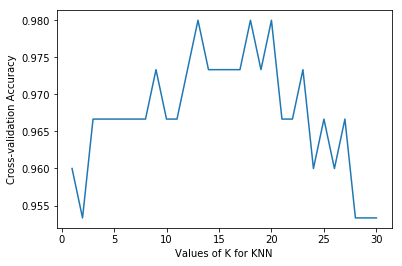

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-validation Accuracy')

## Cross-validation example: model selection

**Goal:** Compare the KNN model with logistic regression on the iris dataset

In [14]:
# 10-fold cross-validation with best model of KNN
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [15]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


## Cross-validation example: feature selection

**Goal:** Select whether the Newspaper feature should be included in linear regression model on the advertisement dataset

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [18]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [19]:
# create a python list of three features
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select the subset of dataFrame
X = data[feature_cols]

# select sales column as response (y)
y = data.sales

In [20]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]
